# Character Embedding

In [107]:
from numpy import array
from pickle import dump
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load
in_filename = 'char_sequences.txt'
raw_text = load_doc(in_filename)
lines = raw_text.split('\n')

# integer encode sequences of characters
chars = sorted(list(set(raw_text)))
mapping = dict((c, i) for i, c in enumerate(chars))
sequences = list()
for line in lines:
	# integer encode line
	encoded_seq = [mapping[char] for char in line]
	# store
	sequences.append(encoded_seq)

# vocabulary size
vocab_size = len(mapping)
print('Vocabulary Size: %d' % vocab_size)

# separate into input and output
sequences = array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
sequences = [to_categorical(x, num_classes=vocab_size) for x in X]
X = array(sequences)
y = to_categorical(y, num_classes=vocab_size)

# define model
model = Sequential()
model.add(LSTM(75, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(X, y, epochs=100, verbose=2)

# save the model to file
model.save('model.h5')
# save the mapping
dump(mapping, open('mapping.pkl', 'wb'))

Vocabulary Size: 38
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 75)                34200     
_________________________________________________________________
dense_1 (Dense)              (None, 38)                2888      
Total params: 37,088
Trainable params: 37,088
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100


InternalError:  Blas GEMM launch failed : a.shape=(32, 75), b.shape=(75, 300), m=32, n=300, k=75
	 [[{{node lstm_1/while/body/_1/MatMul_1}}]] [Op:__inference_keras_scratch_graph_1660]

Function call stack:
keras_scratch_graph


In [92]:
# load doc into memory
def load_doc(filename):
    with open(filename, 'r') as file:
        text = file.read()
        return text

raw_text = load_doc('rhyme.txt')
print(raw_text)

Sing a song of sixpence,
A pocket full of rye.
Four and twenty blackbirds,
Baked in a pie.

When the pie was opened
The birds began to sing;
Wasn't that a dainty dish,
To set before the king.

The king was in his counting house,
Counting out his money;
The queen was in the parlour,
Eating bread and honey.

The maid was in the garden,
Hanging out the clothes,
When down came a blackbird
And pecked off her nose.


In [93]:
# clean
tokens = raw_text.split()
raw_text = ' '.join(tokens)

In [94]:
# organize into sequences of characters
length = 10
sequences = list()
for i in range(length, len(raw_text)):
	# select sequence of tokens
	seq = raw_text[i-length:i+1]
	# store
	sequences.append(seq)
print('Total Sequences: %d' % len(sequences))

Total Sequences: 399


In [95]:
# save tokens to file, one dialog per line
def save_doc(lines, filename):
    data = '\n'.join(lines)
    with open(filename, 'w') as file:
        file.write(data)
        
# save sequences to file
out_filename = 'char_sequences.txt'
save_doc(sequences, out_filename)

In [96]:
in_filename = 'char_sequences.txt'
raw_text = load_doc(in_filename)
lines = raw_text.split('\n')
lines

['Sing a song',
 'ing a song ',
 'ng a song o',
 'g a song of',
 ' a song of ',
 'a song of s',
 ' song of si',
 'song of six',
 'ong of sixp',
 'ng of sixpe',
 'g of sixpen',
 ' of sixpenc',
 'of sixpence',
 'f sixpence,',
 ' sixpence, ',
 'sixpence, A',
 'ixpence, A ',
 'xpence, A p',
 'pence, A po',
 'ence, A poc',
 'nce, A pock',
 'ce, A pocke',
 'e, A pocket',
 ', A pocket ',
 ' A pocket f',
 'A pocket fu',
 ' pocket ful',
 'pocket full',
 'ocket full ',
 'cket full o',
 'ket full of',
 'et full of ',
 't full of r',
 ' full of ry',
 'full of rye',
 'ull of rye.',
 'll of rye. ',
 'l of rye. F',
 ' of rye. Fo',
 'of rye. Fou',
 'f rye. Four',
 ' rye. Four ',
 'rye. Four a',
 'ye. Four an',
 'e. Four and',
 '. Four and ',
 ' Four and t',
 'Four and tw',
 'our and twe',
 'ur and twen',
 'r and twent',
 ' and twenty',
 'and twenty ',
 'nd twenty b',
 'd twenty bl',
 ' twenty bla',
 'twenty blac',
 'wenty black',
 'enty blackb',
 'nty blackbi',
 'ty blackbir',
 'y blackbird',
 ' black

In [97]:
chars = sorted(list(set(raw_text)))
mapping = dict((c, i) for i, c in enumerate(chars))
print(mapping)

{'\n': 0, ' ': 1, "'": 2, ',': 3, '.': 4, ';': 5, 'A': 6, 'B': 7, 'C': 8, 'E': 9, 'F': 10, 'H': 11, 'S': 12, 'T': 13, 'W': 14, 'a': 15, 'b': 16, 'c': 17, 'd': 18, 'e': 19, 'f': 20, 'g': 21, 'h': 22, 'i': 23, 'k': 24, 'l': 25, 'm': 26, 'n': 27, 'o': 28, 'p': 29, 'q': 30, 'r': 31, 's': 32, 't': 33, 'u': 34, 'w': 35, 'x': 36, 'y': 37}


In [98]:
sequences = list()
for line in lines:
    encoded_seq = [mapping[char] for char in line]
    sequences.append(encoded_seq)
sequences

[[12, 23, 27, 21, 1, 15, 1, 32, 28, 27, 21],
 [23, 27, 21, 1, 15, 1, 32, 28, 27, 21, 1],
 [27, 21, 1, 15, 1, 32, 28, 27, 21, 1, 28],
 [21, 1, 15, 1, 32, 28, 27, 21, 1, 28, 20],
 [1, 15, 1, 32, 28, 27, 21, 1, 28, 20, 1],
 [15, 1, 32, 28, 27, 21, 1, 28, 20, 1, 32],
 [1, 32, 28, 27, 21, 1, 28, 20, 1, 32, 23],
 [32, 28, 27, 21, 1, 28, 20, 1, 32, 23, 36],
 [28, 27, 21, 1, 28, 20, 1, 32, 23, 36, 29],
 [27, 21, 1, 28, 20, 1, 32, 23, 36, 29, 19],
 [21, 1, 28, 20, 1, 32, 23, 36, 29, 19, 27],
 [1, 28, 20, 1, 32, 23, 36, 29, 19, 27, 17],
 [28, 20, 1, 32, 23, 36, 29, 19, 27, 17, 19],
 [20, 1, 32, 23, 36, 29, 19, 27, 17, 19, 3],
 [1, 32, 23, 36, 29, 19, 27, 17, 19, 3, 1],
 [32, 23, 36, 29, 19, 27, 17, 19, 3, 1, 6],
 [23, 36, 29, 19, 27, 17, 19, 3, 1, 6, 1],
 [36, 29, 19, 27, 17, 19, 3, 1, 6, 1, 29],
 [29, 19, 27, 17, 19, 3, 1, 6, 1, 29, 28],
 [19, 27, 17, 19, 3, 1, 6, 1, 29, 28, 17],
 [27, 17, 19, 3, 1, 6, 1, 29, 28, 17, 24],
 [17, 19, 3, 1, 6, 1, 29, 28, 17, 24, 19],
 [19, 3, 1, 6, 1, 29, 28, 17, 

In [99]:
# vocabulary size
vocab_size = len(mapping)
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 38


In [100]:
import numpy as np
sequences = np.array(sequences)

In [101]:
print(sequences)

[[12 23 27 ... 28 27 21]
 [23 27 21 ... 27 21  1]
 [27 21  1 ... 21  1 28]
 ...
 [28 20 20 ... 27 28 32]
 [20 20  1 ... 28 32 19]
 [20  1 22 ... 32 19  4]]


In [102]:
X, y = sequences[:,:-1], sequences[:,-1]
print(X)

[[12 23 27 ... 32 28 27]
 [23 27 21 ... 28 27 21]
 [27 21  1 ... 27 21  1]
 ...
 [28 20 20 ...  1 27 28]
 [20 20  1 ... 27 28 32]
 [20  1 22 ... 28 32 19]]


In [103]:
from keras.utils import to_categorical
sequences = [to_categorical(x, num_classes=vocab_size) for x in X]
X = np.array(sequences)
y = to_categorical(y, num_classes=vocab_size)

In [105]:
X[0].shape

(10, 38)

In [106]:
X.shape

(399, 10, 38)

In [109]:
# na = 'nehal ahamad ansari'
# print(list(na))

# Character Embedding

In [ ]:
### Libraries USed Tensorflow> 2.0  and keras

In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3]:
##tensorflow >2.0
from tensorflow.keras.preprocessing.text import one_hot

In [23]:
### sentences
sent=['the glass of milk',
      'the glass of juice',
      'the cup of tea',
      'I am a good boy',
      'I am a good developer',
      'understand the meaning of words',
      'your videos are good',]
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

In [6]:
### Vocabulary size
voc_size = 10000

#### One Hot Representation

In [7]:
onehot_repr = [one_hot(words, voc_size) for words in sent] 
print(onehot_repr)

[[7732, 4553, 9598, 4768], [7732, 4553, 9598, 277], [7732, 1910, 9598, 4754], [1025, 5929, 4305, 5857, 6579], [1025, 5929, 4305, 5857, 3115], [3837, 7732, 2739, 9598, 4242], [3073, 7764, 1056, 5857]]


#### Word Embedding Represntation

In [8]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import numpy as np

In [9]:
sent_length = 8

embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)
print(embedded_docs)

[[   0    0    0    0 7732 4553 9598 4768]
 [   0    0    0    0 7732 4553 9598  277]
 [   0    0    0    0 7732 1910 9598 4754]
 [   0    0    0 1025 5929 4305 5857 6579]
 [   0    0    0 1025 5929 4305 5857 3115]
 [   0    0    0 3837 7732 2739 9598 4242]
 [   0    0    0    0 3073 7764 1056 5857]]


In [20]:
dim = 10

In [21]:
model = Sequential()
model.add(Embedding(voc_size, 10, input_length=sent_length))
model.compile('adam','mse')

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 8, 10)             100000    
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
_________________________________________________________________


In [17]:
print(model.predict(embedded_docs))

[[[-0.04594135 -0.03731829  0.03933686 -0.01965104 -0.02525681
   -0.02359327  0.00281694 -0.00398745 -0.04358212  0.00718329]
  [-0.04594135 -0.03731829  0.03933686 -0.01965104 -0.02525681
   -0.02359327  0.00281694 -0.00398745 -0.04358212  0.00718329]
  [-0.04594135 -0.03731829  0.03933686 -0.01965104 -0.02525681
   -0.02359327  0.00281694 -0.00398745 -0.04358212  0.00718329]
  [-0.04594135 -0.03731829  0.03933686 -0.01965104 -0.02525681
   -0.02359327  0.00281694 -0.00398745 -0.04358212  0.00718329]
  [-0.01867181  0.0138929   0.03154982 -0.00793622 -0.02706308
   -0.02240345  0.0373024   0.04962545  0.03349898  0.03614878]
  [-0.01783334  0.01297748 -0.04288355 -0.01727451 -0.04122944
   -0.04575149  0.03622301  0.00517515  0.01988683 -0.0035219 ]
  [-0.03130613  0.01277229 -0.0463866  -0.01891569 -0.0043784
   -0.0398315  -0.03118    -0.03685899 -0.03824515 -0.00927491]
  [ 0.00883367  0.00552231  0.00674702  0.02879259  0.02292639
    0.03772236 -0.00447749 -0.01918666 -0.0337342

In [18]:
embedded_docs[0]

array([   0,    0,    0,    0, 7732, 4553, 9598, 4768])

In [19]:
print(model.predict(embedded_docs)[0])

[[-0.04594135 -0.03731829  0.03933686 -0.01965104 -0.02525681 -0.02359327
   0.00281694 -0.00398745 -0.04358212  0.00718329]
 [-0.04594135 -0.03731829  0.03933686 -0.01965104 -0.02525681 -0.02359327
   0.00281694 -0.00398745 -0.04358212  0.00718329]
 [-0.04594135 -0.03731829  0.03933686 -0.01965104 -0.02525681 -0.02359327
   0.00281694 -0.00398745 -0.04358212  0.00718329]
 [-0.04594135 -0.03731829  0.03933686 -0.01965104 -0.02525681 -0.02359327
   0.00281694 -0.00398745 -0.04358212  0.00718329]
 [-0.01867181  0.0138929   0.03154982 -0.00793622 -0.02706308 -0.02240345
   0.0373024   0.04962545  0.03349898  0.03614878]
 [-0.01783334  0.01297748 -0.04288355 -0.01727451 -0.04122944 -0.04575149
   0.03622301  0.00517515  0.01988683 -0.0035219 ]
 [-0.03130613  0.01277229 -0.0463866  -0.01891569 -0.0043784  -0.0398315
  -0.03118    -0.03685899 -0.03824515 -0.00927491]
 [ 0.00883367  0.00552231  0.00674702  0.02879259  0.02292639  0.03772236
  -0.00447749 -0.01918666 -0.03373426 -0.04931277]]


In [29]:
import re
te = 'nehal <h<a>al> ahamad<jam>'
print(te)

te = re.sub('\<.*?\>', '', te)
print(te)

nehal <h<a>al> ahamad<jam>
nehal al> ahamad


In [5]:
import re
mm = 'nehalahamad.com'
re.split('\.', mm)

['nehalahamad', 'com']

In [6]:
with open('documents/alt.atheism_49960.txt', 'r') as f:
    Input_Text = f.read()
    print(Input_Text)

From: mathew <mathew@mantis.co.uk>
Subject: Alt.Atheism FAQ: Atheist Resources

Archive-name: atheism/resources
Alt-atheism-archive-name: resources
Last-modified: 11 December 1992
Version: 1.0

                              Atheist Resources

                      Addresses of Atheist Organizations

                                     USA

FREEDOM FROM RELIGION FOUNDATION

Darwin fish bumper stickers and assorted other atheist paraphernalia are
available from the Freedom From Religion Foundation in the US.

Write to:  FFRF, P.O. Box 750, Madison, WI 53701.
Telephone: (608) 256-8900

EVOLUTION DESIGNS

Evolution Designs sell the "Darwin fish".  It's a fish symbol, like the ones
Christians stick on their cars, but with feet and the word "Darwin" written
inside.  The deluxe moulded 3D plastic fish is $4.95 postpaid in the US.

Write to:  Evolution Designs, 7119 Laurel Canyon #4, North Hollywood,
           CA 91605.

People in the San Francisco Bay area can get Darwin Fish from Lynn Gold

In [8]:
subject = re.search(r'Subject:.*', Input_Text)
subject = Input_Text[subject.start():subject.end()]

In [9]:
subject

'Subject: Alt.Atheism FAQ: Atheist Resources'

## Manual Embedding

In [11]:
import numpy as np
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
# define class labels
labels = np.array([1,1,1,1,1,0,0,0,0,0])

In [13]:
from tensorflow.keras.preprocessing.text import one_hot
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[25, 4], [13, 37], [22, 1], [6, 37], [7], [11], [6, 1], [44, 13], [6, 37], [19, 28, 4, 47]]


In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# pad documents to a max length of 4 words
max_length = max([len(i) for i in encoded_docs])
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[25  4  0  0]
 [13 37  0  0]
 [22  1  0  0]
 [ 6 37  0  0]
 [ 7  0  0  0]
 [11  0  0  0]
 [ 6  1  0  0]
 [44 13  0  0]
 [ 6 37  0  0]
 [19 28  4 47]]


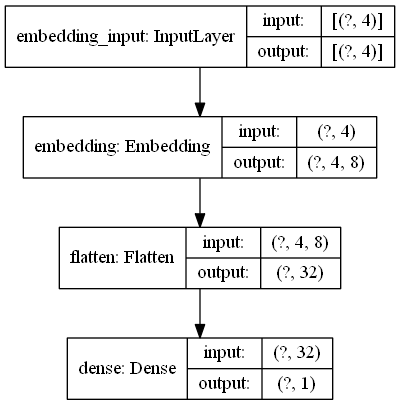

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

In [23]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 8)              400       
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 89.999998


# Keras Embedding

In [66]:
# importing liberaries
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding, Conv1D

In [70]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1

print('vocabe size: ', vocab_size)
print(t.word_index)

vocabe size:  15
{'work': 1, 'done': 2, 'good': 3, 'effort': 4, 'poor': 5, 'well': 6, 'great': 7, 'nice': 8, 'excellent': 9, 'weak': 10, 'not': 11, 'could': 12, 'have': 13, 'better': 14}


In [56]:
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]


In [58]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


In [71]:
# load the whole embedding into memory
with open('glove_vectors', 'rb') as f:
    embeddings_index = pickle.load(f)


# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))

for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector
        
print('embedding matrix shape: ', embedding_matrix.shape)

embedding matrix shape:  (15, 300)


In [75]:
# define model
model = Sequential()
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 4, 300)            4500      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1201      
Total params: 5,701
Trainable params: 1,201
Non-trainable params: 4,500
_________________________________________________________________
None


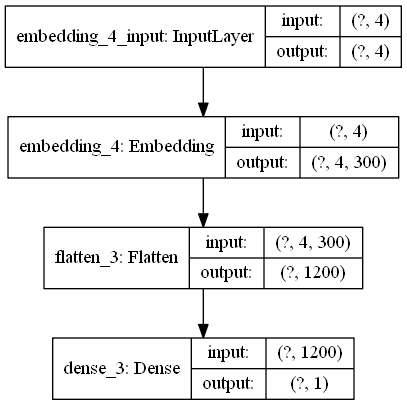

In [76]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

In [77]:
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)

# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 100.000000


In [67]:
def evaluate_model(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 0, 10, 32
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    print(model.summary())
    
    # fit network
#     model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
#     _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
#     return accuracy



In [69]:
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

In [68]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

NameError: name 'n_timesteps' is not defined

In [80]:
import os
if not os.path.isfile('preprocessed_document'):
    print('no')
else:
    print('yes')

yes
